In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("default")

In [2]:
conduit = gpd.read_file("SLS-05_Conduit/Conduit_SLS05.shp")
type(conduit)

geopandas.geodataframe.GeoDataFrame

In [3]:
conduit.shape

(1483, 13)

In [4]:
conduit.head()

,D,FLOW,ID,INV_STRT,INV_STP,LABEL,L,SLOP_M_KM,STRT_NODE,SOP_NODE,VEL_AVE,Con_Label,geometry
0,200.0,1.522,14358.0,4.32,4.27,CJAS5-1,11.9,4.500,MJAS5-299,MJAS5-300,0.40,1.0,"LINESTRING (552813.430 631292.778, 552814.130 ..."
1,200.0,2.183,14362.0,6.31,6.25,CJAS5-2,13.3,4.000,MJAS5-1140,MJAS5-1087,0.43,2.0,"LINESTRING (552269.200 632139.036, 552255.871 ..."
2,200.0,-1.000,14368.0,5.76,4.57,CJAS5-3,14.7,80.811,MJAS5-830,MJAS5-821,-1.00,3.0,"LINESTRING (553182.342 631809.511, 553181.474 ..."
3,200.0,1.203,14378.0,6.37,6.31,CJAS5-4,15.3,4.500,MJAS5-1308,MJAS5-1140,0.37,4.0,"LINESTRING (552280.396 632128.546, 552269.200 ..."
4,200.0,0.481,14381.0,4.57,4.50,CJAS5-5,15.5,4.500,MJAS5-820,MJAS5-821,0.28,5.0,"LINESTRING (553170.848 631783.485, 553171.095 ..."


In [5]:
conduit.columns

Index(['D', 'FLOW', 'ID', 'INV_STRT', 'INV_STP', 'LABEL', 'L', 'SLOP_M_KM',
       'STRT_NODE', 'SOP_NODE', 'VEL_AVE', 'Con_Label', 'geometry'],
      dtype='object')

In [8]:
conduit.isna().sum()

D            0
FLOW         0
ID           0
INV_STRT     0
INV_STP      0
LABEL        0
L            0
SLOP_M_KM    0
STRT_NODE    0
SOP_NODE     0
VEL_AVE      0
Con_Label    0
geometry     0
dtype: int64

In [13]:
df = conduit[["LABEL", "INV_STRT", "INV_STP", "L", "SLOP_M_KM"]]
df.shape

(1483, 5)

In [7]:
df.head()

,LABEL,INV_STRT,INV_STP,L,SLOP_M_KM
0,CJAS5-1,4.32,4.27,11.9,4.500
1,CJAS5-2,6.31,6.25,13.3,4.000
2,CJAS5-3,5.76,4.57,14.7,80.811
3,CJAS5-4,6.37,6.31,15.3,4.500
4,CJAS5-5,4.57,4.50,15.5,4.500


In [14]:
df["CALCULATED_STP"] = df["INV_STRT"] - ((df["SLOP_M_KM"]/1000)*df["L"])
df.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LABEL,INV_STRT,INV_STP,L,SLOP_M_KM,CALCULATED_STP
0,CJAS5-1,4.32,4.27,11.9,4.500,4.266450
1,CJAS5-2,6.31,6.25,13.3,4.000,6.256800
2,CJAS5-3,5.76,4.57,14.7,80.811,4.572078
3,CJAS5-4,6.37,6.31,15.3,4.500,6.301150
4,CJAS5-5,4.57,4.50,15.5,4.500,4.500250


In [16]:
df["diff"] = abs(df["INV_STP"] - df["CALCULATED_STP"])
df.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LABEL,INV_STRT,INV_STP,L,SLOP_M_KM,CALCULATED_STP,diff
0,CJAS5-1,4.32,4.27,11.9,4.500,4.266450,0.003550
1,CJAS5-2,6.31,6.25,13.3,4.000,6.256800,0.006800
2,CJAS5-3,5.76,4.57,14.7,80.811,4.572078,0.002078
3,CJAS5-4,6.37,6.31,15.3,4.500,6.301150,0.008850
4,CJAS5-5,4.57,4.50,15.5,4.500,4.500250,0.000250


In [21]:
df["GRT_diff"] = np.where(df["diff"] >= 0.01, 1, 0)
df.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LABEL,INV_STRT,INV_STP,L,SLOP_M_KM,CALCULATED_STP,diff,GRT_diff
0,CJAS5-1,4.32,4.27,11.9,4.500,4.266450,0.003550,0
1,CJAS5-2,6.31,6.25,13.3,4.000,6.256800,0.006800,0
2,CJAS5-3,5.76,4.57,14.7,80.811,4.572078,0.002078,0
3,CJAS5-4,6.37,6.31,15.3,4.500,6.301150,0.008850,0
4,CJAS5-5,4.57,4.50,15.5,4.500,4.500250,0.000250,0


In [38]:
li = []

for x in range(len(df)):
    if(df["GRT_diff"][x] == 1):
        li.append(df["LABEL"][x])
        
li

[]

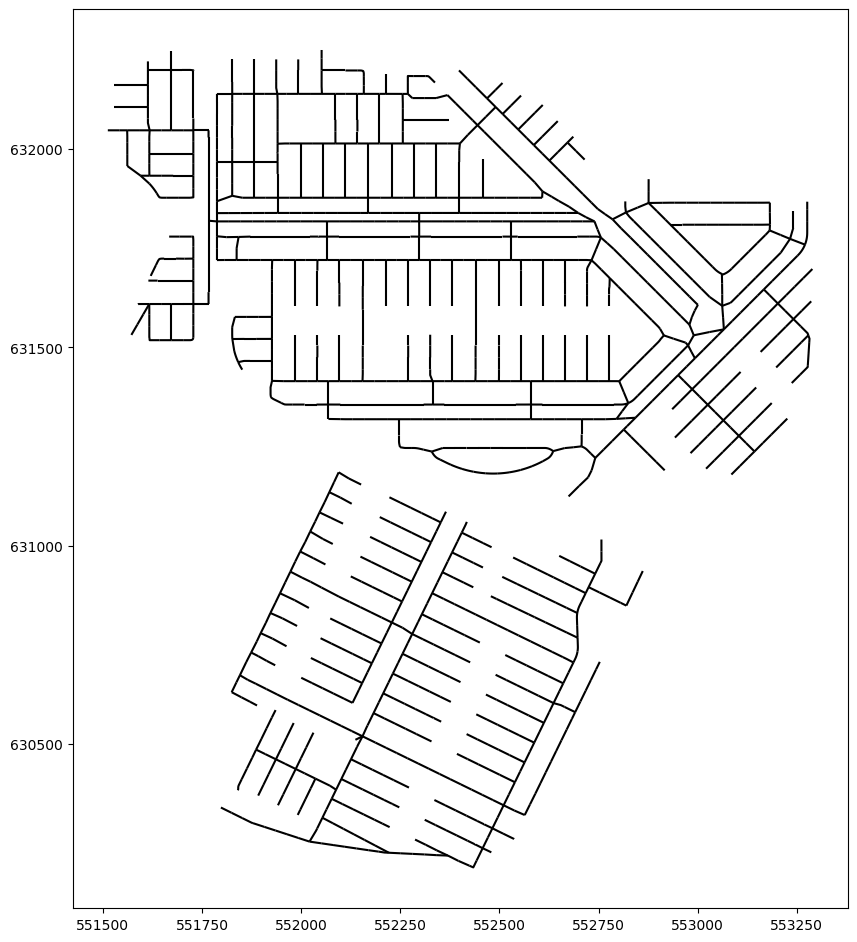

In [37]:
fig, ax = plt.subplots(figsize=(10,14))
conduit.plot(ax=ax, edgecolor="black");

In [39]:
np.where(df["LABEL"] == "CJAS5-1362")

(array([1361], dtype=int64),)

In [41]:
df.iloc[1361]

LABEL             CJAS5-1362
INV_STRT                5.81
INV_STP                 4.45
L                       49.8
SLOP_M_KM             27.287
CALCULATED_STP       4.45111
diff               0.0011074
GRT_diff                   0
Name: 1361, dtype: object